In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression








In [14]:
calhouse = pd.read_csv('flights-clean.csv')
calhouse.head()

,airline,orignum,deptime,depdelay,arrdelay,cancelled,distance
0,19805.0,74.0,854.0,0.0,2.0,0.0,2475.0
1,19805.0,76.0,944.0,14.0,0.0,0.0,2475.0
2,19805.0,74.0,1224.0,0.0,39.0,0.0,2475.0
3,19805.0,76.0,1240.0,25.0,0.0,0.0,2475.0
4,19805.0,68.0,1300.0,0.0,15.0,0.0,3784.0


In [15]:


X = calhouse[["orignum", "deptime", "arrdelay"]]
y = calhouse["depdelay"].values.reshape(-1, 1)
print(X.shape, y.shape)
A=X
b=y
X

(483499, 3) (483499, 1)


,orignum,deptime,arrdelay
0,74.0,854.0,2.0
1,76.0,944.0,0.0
2,74.0,1224.0,39.0
3,76.0,1240.0,0.0
4,68.0,1300.0,15.0
5,79.0,1901.0,95.0
6,68.0,1410.0,138.0
7,72.0,1659.0,0.0
8,74.0,648.0,19.0
9,76.0,2156.0,1.0


# Multiple Linear Regression

Multiple Linear Regression simply means that you have more than one feature variable.

For the Housing Price example, you may have features like this:

$Y_i$ = $Bias_0$ + $Weight_1$ sq_feet + $Weight_2$ num_bedrooms + $Weight_3$ num_bathrooms

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Generate a linear dataset with 3 features

In [16]:
from sklearn.datasets import make_regression

#n_features = 3
#X, y = make_regression(n_samples=30, n_features=n_features, 
#                     n_informative=n_features, random_state=42, 
#                       noise=0.5, bias=100.0)

print(X.shape)
df = pd.DataFrame(data=X)
#del df['index']

print (df)


(483499, 3)
        orignum  deptime  arrdelay
0          74.0    854.0       2.0
1          76.0    944.0       0.0
2          74.0   1224.0      39.0
3          76.0   1240.0       0.0
4          68.0   1300.0      15.0
5          79.0   1901.0      95.0
6          68.0   1410.0     138.0
7          72.0   1659.0       0.0
8          74.0    648.0      19.0
9          76.0   2156.0       1.0
10         76.0   1113.0       0.0
11         79.0   2235.0       0.0
12         66.0    611.0       0.0
13         83.0   1312.0       0.0
14         65.0    630.0       0.0
15         83.0     22.0      88.0
16         74.0   1024.0      18.0
17         83.0   1715.0     120.0
18         74.0   1906.0      16.0
19         76.0   1458.0      11.0
20         68.0    706.0       0.0
21         83.0    724.0       0.0
22         66.0    730.0      14.0
23         66.0   1045.0       0.0
24         79.0    649.0       0.0
25         77.0   1746.0     130.0
26         76.0    553.0       0.0
27      

In [17]:
#X=X.values


With 3 or more dimensions, it becomes harder to visualize the linear trends in our data

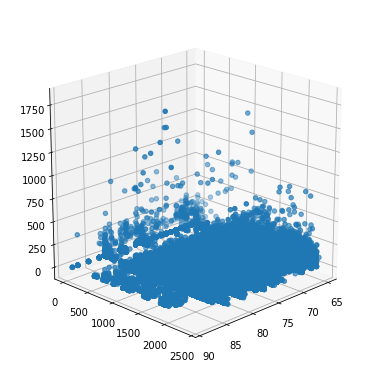

In [18]:
from mpl_toolkits.mplot3d import Axes3D
X=X.values
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], cmap=plt.cm.get_cmap("Spectral"))
plt.show()

We can still visualize 3 features as a 3D plot, but what about n-dimensions? This becomes very difficult for the human brain to visualize. 

We could pick just one feature from X to fit our model, but what we really want it to find a line that best fits the data in n-dimensional space. To achieve this, Linear Regression can be solved using the analytical approach called [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) or a computational approach [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) for estimating the parameters. Note that there are [tradeoffs](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent) between using either approach. The Linear Regression model in Sklearn uses the Ordinary Least Squares method.

Luckily, we can just supply our n-dimensional features and sklearn will fit the model using all of our features.

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9195876333782896


## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

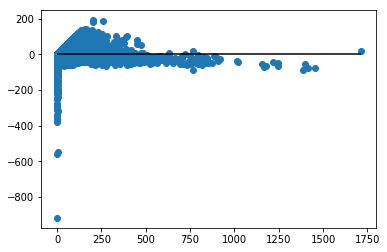

In [21]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [22]:
#We want our predictions to be close to zero on the y-axis in this plot.

In [23]:
#ELASTICNET ANALYSIS

In [24]:
#X, y = make_regression(n_features=2, random_state=0)
# A and b are same as X and y

regr = ElasticNet(random_state=0)

#n12 = np.squeeze(np.asarray(n2))

#X12 = np.squeeze(np.asarray(x1))

regr.fit(A, b)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
      
print(regr.coef_) 

print(regr.intercept_) 

#print(regr.predict([[0,0]])) 

[0.01847755 0.00206471 0.95452325]
[-3.78300348]
